In [12]:
import numpy as np

# Generate random noise
noise = np.random.rand(1000, 1)

# Generate random weights and bias
weights = np.random.rand(1)
bias = np.random.rand(1)

# Generate input features
X = np.random.rand(1000, 28, 28, 1)

# Generate labels by adding noise to a linear function
y = weights * X 
y = np.sum(y, axis=(1,2)) + bias + noise



In [13]:
weights, bias, y.shape

(array([0.98940285]), array([0.78988734]), (1000, 1))

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [15]:
X_train.shape

(800, 28, 28, 1)

In [16]:
y_train.shape

(800, 1)

In [17]:
X_val.shape, y_val.shape

((200, 28, 28, 1), (200, 1))

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 401,857
Trainable params: 401,857
Non-trainable params: 0
________________________________________________

In [20]:
# Define a model checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'model.ckpt', save_best_only=True, monitor='val_loss', mode='min', save_freq='epoch'
)

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[checkpoint_callback])


Epoch 1/10
22/25 [=========================>....] - ETA: 0s - loss: 123257.0703 

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 2s 35ms/step - loss: 117116.0625 - val_loss: 60163.1719
Epoch 2/10
23/25 [==========================>...] - ETA: 0s - loss: 17630.2441

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 28ms/step - loss: 16539.5918 - val_loss: 4258.9424
Epoch 3/10
23/25 [==========================>...] - ETA: 0s - loss: 1151.8462

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 28ms/step - loss: 1089.6343 - val_loss: 298.0312
Epoch 4/10
19/25 [=====================>........] - ETA: 0s - loss: 88.3752 

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 28ms/step - loss: 76.8727 - val_loss: 25.2347
Epoch 5/10
23/25 [==========================>...] - ETA: 0s - loss: 15.7981

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 29ms/step - loss: 15.4597 - val_loss: 13.2213
Epoch 6/10
23/25 [==========================>...] - ETA: 0s - loss: 13.5894

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 27ms/step - loss: 13.2937 - val_loss: 12.3064
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 12.8270 - val_loss: 12.9516
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 12.8298 - val_loss: 12.5807
Epoch 9/10
25/25 [==============================] - ETA: 0s - loss: 12.7944

INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


25/25 [==============================] - 1s 32ms/step - loss: 12.7944 - val_loss: 12.2614
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 12.9824 - val_loss: 12.6106


<AxesSubplot:>

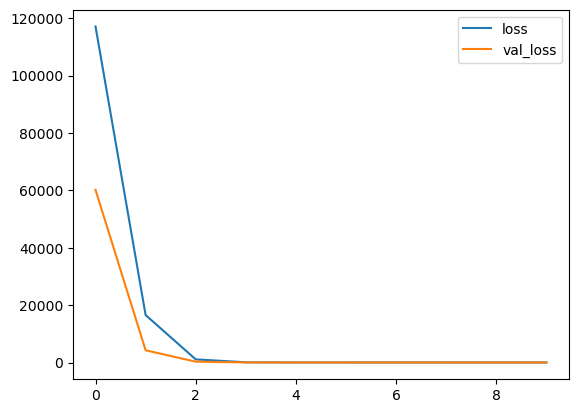

In [21]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist.plot()
